In [1]:
from chainer import datasets, serializers
from vae import IAFVAE
import matplotlib.pyplot as plt

/Users/daisuke.motoki/.pyenv/versions/3.5.1/envs/chainer/lib/python3.5/site-packages/chainer/_environment_check.py:38: UserWarning: Accelerate has been detected as a NumPy backend library.
vecLib, which is a part of Accelerate, is known not to work correctly with Chainer.
We recommend using other BLAS libraries such as OpenBLAS.
For details of the issue, please see
https://docs.chainer.org/en/stable/tips.html#mnist-example-does-not-converge-in-cpu-mode-on-mac-os-x.

Also note that Chainer does not officially support Mac OS X.
Please use it at your own risk.

  ''')  # NOQA


In [2]:
result_dir = "result/vae-mnist"
_, test = datasets.get_mnist(withlabel=False, ndim=1)

h_channel = 2
params = dict(
    in_channel=28*28,
    h_channel=h_channel,
    depth=1,
    n_iaf_block=1,
    iaf_params=dict(
        in_dim=h_channel,
        z_dim=2,
        h_dim=h_channel,
    )
)
model = IAFVAE(**params)
serializers.load_npz(result_dir + "/model_weights.npz", model)

In [3]:
recon, _, _ = model(test[0:10])

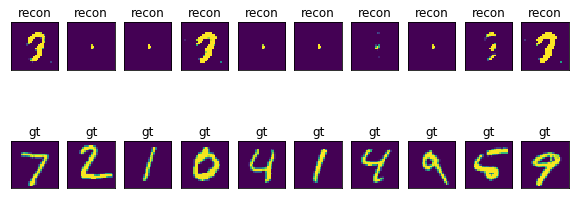

In [4]:
nplot = 10
figs = plt.figure(figsize=(10, 4))

for n in range(nplot):
    ax = figs.add_subplot(2, nplot, n+1)
    ax.imshow(recon.data[n].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("recon")
    
    ax = figs.add_subplot(2, nplot, nplot+n+1)
    gt_result = test[n].reshape(28,28)
    ax.imshow(gt_result)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("gt")
    
plt.show()

In [13]:
recon.data[n].shape

(784,)

In [12]:
import numpy as np
img = model.generate(np.array([0.0,0.0], dtype="float32"), batch_size=10)

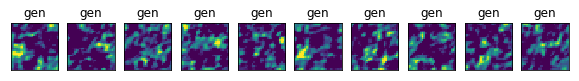

In [56]:
import numpy as np
img = model.generate(np.array([0.0,0.0], dtype="float32"), batch_size=10)

nplot = 10
figs = plt.figure(figsize=(10, 4))

for n in range(nplot):
    ax = figs.add_subplot(2, nplot, n+1)
    ax.imshow(img.data[n][0])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("gen")
plt.show()

In [104]:
model.iaf_layers[0].forward_down(np.array([0.,0.], dtype="float32"),sample=True)

IndexError: tuple index out of range